Exploratory Data Analysis

Question 1A: Shape of the dataset

In [22]:


import pandas as pd

# Specify the file path
file_path = 'Hotel_Reviews.csv'

# Import the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the shape of the dataset
print(df.shape)


(515738, 17)


Question 1B: Convert reviews into integers from 1 to 10.

First, let's check the range of vaules of Reviewer_Score:

In [23]:
# Find the minimum and maximum values of the Reviewer_Score column
min_score = df['Reviewer_Score'].min()
max_score = df['Reviewer_Score'].max()

# Display the range
print(f"The range of Reviewer_Score is from {min_score} to {max_score}")


The range of Reviewer_Score is from 2.5 to 10.0


Second, to convert the Reviewer_Score column in my dataset, which has a range from 2.5 to 10.0, to integers from 1 to 10, I can use a simple linear mapping function.

In [24]:
# Define the mapping function
def map_scores(score):
    return int((score - 2.5) / (10.0 - 2.5) * 9) + 1

# Convert the Reviewer_Score column to integers
df['Reviewer_Score'] = df['Reviewer_Score'].apply(map_scores)

print(df.head())

                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                     

Question 1C:

I expect the distribution of scores to look like a normal distribution. 

But to understand the actual distribution of reviews, I frist use value count the frequency of each unique value in the column. Next, I create a bar plot of the distribution.

9     130537
10    115853
7     109647
8      47584
6      44088
4      30226
5      15522
3      11469
1       6605
2       4207
Name: Reviewer_Score, dtype: int64


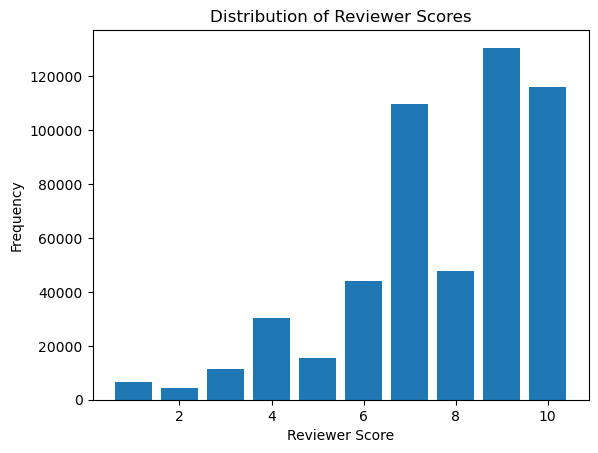

In [25]:
import matplotlib.pyplot as plt


# Calculate the value counts of Reviewer_Score
score_counts = df['Reviewer_Score'].value_counts()

#Display the distribtion
print(score_counts)

# Create a bar plot of the distribution
plt.bar(score_counts.index, score_counts.values)

# Set the labels and title
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reviewer Scores')

# Display the plot
plt.show()



Question 1D: What are the potential problem with this distribution?

A major problem is class imbalance. There is a discrepency in the distribution of the review scores. Scores of 9, 10, and 7 have a  higher frequency while scores of 1, 2, 3, 4, 5, 6, and 8 have lower frequency.

The model may become biased towards the higher scores (9 or 10) as they are more prevalent in the dataset, resulting in lower accuracy and performance in predicting the minoriy classes.

Question 2

In [26]:
# Get the data types of each column
column_types = df.dtypes

# Separate numeric and non-numeric columns
numeric_columns = column_types[column_types != 'object'].index
non_numeric_columns = column_types[column_types == 'object'].index

# Print the numeric and non-numeric columns
print("Numeric Columns:")
print(numeric_columns)
print("\nNon-Numeric Columns:")
print(non_numeric_columns)


Numeric Columns:
Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat',
       'lng'],
      dtype='object')

Non-Numeric Columns:
Index(['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review'],
      dtype='object')


In [27]:
# Encode 'Hotel_Name' column
hotel_name_encoded = pd.get_dummies(df['Hotel_Name'], prefix='Hotel_Name')
df = pd.concat([df, hotel_name_encoded], axis=1)

# Encode 'Reviewer_Nationality' column
reviewer_nationality_encoded = pd.get_dummies(df['Reviewer_Nationality'], prefix='Reviewer_Nationality')
df = pd.concat([df, reviewer_nationality_encoded], axis=1)


# Encode 'days_since_review' column
days_since_review_encoded = pd.get_dummies(df['days_since_review'], prefix='days_since_review')
df = pd.concat([df, days_since_review_encoded], axis=1)

# Drop the original non-numeric columns
df.drop(['Hotel_Name', 'Reviewer_Nationality', 'days_since_review'], axis=1, inplace=True)

print(df.dtypes)

Hotel_Address                    object
Additional_Number_of_Scoring      int64
Review_Date                      object
Average_Score                   float64
Negative_Review                  object
                                 ...   
days_since_review_95 days         uint8
days_since_review_96 days         uint8
days_since_review_97 days         uint8
days_since_review_98 days         uint8
days_since_review_99 days         uint8
Length: 2464, dtype: object


Question 3A: Convert the Reviewer_Score column into a binary column in the following way. 

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('Reviewer_Score', axis=1)
y = df['Reviewer_Score']

# Perform stratified sampling to get a subsample of approximately 10% of the data
X_train, X_subsample, y_train, y_subsample = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Verify that all classes are included in the subsample
unique_classes = y.unique()
subsample_classes = y_subsample.unique()

print("Unique Classes:", unique_classes)
print("Subsample Classes:", subsample_classes)


Unique Classes: [ 1  7  6  2  3 10  5  4  9  8]
Subsample Classes: [10  5  6  9  3  7  1  8  4  2]


In [19]:
# Convert Reviewer_Score column to binary
y_subsample_binary = y_subsample.apply(lambda x: 0 if x < 9 else 1)

# Print the unique values in the binary column
unique_values = y_subsample_binary.unique()
print("Unique Values:", unique_values)


Unique Values: [1 0]


Question 3B: Convert the Reviewer_Score column into a binary column in the following way. 

In the original dataset, the Non-Numeric Columns inlcude:
'Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review'.



In [34]:
import pandas as pd

# Select the columns to convert to numeric
columns_to_convert = ['Hotel_Address', 'Review_Date',  'Negative_Review', 'Positive_Review', 'Tags']

# Perform one-hot encoding on selected columns
X_subsample_encoded = pd.get_dummies(X_subsample, columns=columns_to_convert)

# Drop non-numeric columns except 'Positive_Review' and 'Negative_Review'
non_numeric_columns = X_subsample_encoded.select_dtypes(exclude=['number']).columns
non_numeric_columns = non_numeric_columns[~non_numeric_columns.isin(['Positive_Review', 'Negative_Review'])]
X_subsample_encoded = X_subsample_encoded.drop(non_numeric_columns, axis=1)

# Print the updated columns of X_subsample_encoded
print("Updated Columns:")
print(X_subsample_encoded.columns)


Updated Columns:
Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'lat', 'lng',
       'Hotel_Name_11 Cadogan Gardens', 'Hotel_Name_1K Hotel',
       ...
       'Tags_[' With a pet ', ' Leisure trip ', ' Solo traveler ', ' Double or Twin Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']',
       'Tags_[' With a pet ', ' Leisure trip ', ' Solo traveler ', ' King Room ', ' Stayed 1 night ']',
       'Tags_[' With a pet ', ' Leisure trip ', ' Solo traveler ', ' Park Deluxe Twin ', ' Stayed 1 night ']',
       'Tags_[' With a pet ', ' Leisure trip ', ' Solo traveler ', ' Single Room Lower Ground Floor ', ' Stayed 2 nights ', ' Submitted from a mobile device ']',
       'Tags_[' With a pet ', ' Leisure trip ', ' Solo traveler ', ' Standard Queen or Twin Room Lower Ground Floor ', ' Stayed 2 nights ', ' S

Question 3C: Split the data into train and test sets

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = X_subsample
y = y_subsample

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (41259, 2463) (41259,)
Test set shape: (10315, 2463) (10315,)


Question 3D: Vertorize the columns

In [10]:
X_train_numeric = X_train[['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags',
       'days_since_review', 'lat', 'lng']]
X_test_numeric = X_test[['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags',
       'days_since_review', 'lat', 'lng']]


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

vectorizer_positive = CountVectorizer(min_df=1)
vectorizer_negative = CountVectorizer(min_df=1)
X_positive_train = vectorizer_positive.fit_transform(X_subsample['Positive_Review'])
X_negative_train = vectorizer_negative.fit_transform(X_subsample['Negative_Review'])

X_positive_test = vectorizer_positive.transform(X_subsample['Positive_Review'])
X_negative_test = vectorizer_negative.transform(X_subsample['Negative_Review'])

X_subsample_combined = hstack((X_subsample.drop(['Positive_Review', 'Negative_Review'], axis=1), X_positive_train, X_negative_train))
X_subsample_combined = hstack((X_subsample.drop(['Positive_Review', 'Negative_Review'], axis=1), X_positive_test, X_negative_test))


TypeError: no supported conversion for types: (dtype('O'), dtype('int64'), dtype('int64'))

Question 3E: min_df parameter 

The min_df parameter in the CountVectorizer controls the minimum frequency threshold for a word to be included in the vocabulary. 

If min_df is an integer, it represents the minimum count of occurrences for a token to be included in the vocabulary. 
If min_df is between 0 and 1, it represents the minimum percentage of occurrences for a token to be included in the vocabulary.
